# Classification of Images of Geometric Shapes

## 1. Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import cv2

from keras.utils import to_categorical, load_img
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

## 2. Load in the data

(100, 100)


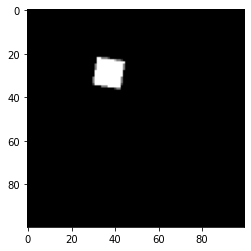

In [2]:
data_direc = 'geometric shapes dataset'
classes = []
#Obtain the name of the class directories we will work with
for i in os.listdir(data_direc):
    classes.append(i)

#read in images from separate class directories
data = []
class_labels = []
scale_factor = 0.5

label = 0
for i in classes:
    path = data_direc+'/'+str(i)
    images = os.listdir(path)
    for img in images:
        image = cv2.imread(path+'/'+img,0) #read in the image in greyscale to reduce computation time
        size = (int(image.shape[1] * scale_factor), int(image.shape[0] * scale_factor)) 
        image = cv2.resize(image, size, interpolation=cv2.INTER_LINEAR) #resize using aspect ratio
        image = np.array(image)
        data.append(image) #add image to dataset
        class_labels.append(label) #add associated integer label to class_labels list
    label = label + 1

plt.imshow(data[10001], cmap='gray')
print(data[20000].shape)

## 3. Split data into training and testing

In [65]:
#Convert images and labels to numpy arrays
training_images = np.array(data)
training_labels = np.array(class_labels)

#Convert labels into One-Hot Encoded labels
training_labels = to_categorical(training_labels, num_classes = 3)

#Split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(training_images, training_labels,   
                                                    test_size = 0.25, random_state = 42, shuffle=True)

#Regularize images to ease computation
x_train = x_train/255
x_test = x_test/255

#Reshape, adding a channels dimension
x_train = x_train.reshape(-1,100,100,1)
x_test = x_test.reshape(-1,100,100,1)

#Verify dimensions of training and testing sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22500, 100, 100, 1)
(7500, 100, 100, 1)
(22500, 3)
(7500, 3)


## 4. Convolutional Neural Network Setup

In [ ]:
#just testing github, learning slowly but surely